<a href="https://colab.research.google.com/github/ritwiks9635/Tabular_Data_Projects_File/blob/main/Random_Forest_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Random Forest Classifier + Feature Importance** 🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳🌳

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("income_evaluation.csv")
data.head()

age          workclass   fnlwgt   education   education-num  \
0   39          State-gov    77516   Bachelors              13   
1   50   Self-emp-not-inc    83311   Bachelors              13   
2   38            Private   215646     HS-grad               9   
3   53            Private   234721        11th               7   
4   28            Private   338409   Bachelors              13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

    capital-gain   capital-loss   hours-per-week  native-country  income  
0           2174              0               40   United-States   <=50K  
1              0              0               13   United-States   <=50K  
2              0              0               40   United-States   <=50K  
3              0              0               40   United-States   <=50K  
4              0              0               40            Cuba   <=50K

In [5]:
data.shape

(32561, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

In [8]:
data.columns = col_names

In [9]:
data.head()

age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [10]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [11]:
data.describe(include = "all")

age workclass        fnlwgt education  education_num  \
count   32561.000000     32561  3.256100e+04     32561   32561.000000   
unique           NaN         9           NaN        16            NaN   
top              NaN   Private           NaN   HS-grad            NaN   
freq             NaN     22696           NaN     10501            NaN   
mean       38.581647       NaN  1.897784e+05       NaN      10.080679   
std        13.640433       NaN  1.055500e+05       NaN       2.572720   
min        17.000000       NaN  1.228500e+04       NaN       1.000000   
25%        28.000000       NaN  1.178270e+05       NaN       9.000000   
50%        37.000000       NaN  1.783560e+05       NaN      10.000000   
75%        48.000000       NaN  2.370510e+05       NaN      12.000000   
max        90.000000       NaN  1.484705e+06       NaN      16.000000   

             marital_status       occupation relationship    race    sex  \
count                 32561            32561        32561   32561  32561   
unique                    7               15            6       5      2   
top      Married-civ-spouse   Prof-specialty      Husband   White   Male   
freq                  14976             4140        13193   27816  21790   
mean                    NaN              NaN          NaN     NaN    NaN   
std                     NaN              NaN          NaN     NaN    NaN   
min                     NaN              NaN          NaN     NaN    NaN   
25%                     NaN              NaN          NaN     NaN    NaN   
50%                     NaN              NaN          NaN     NaN    NaN   
75%                     NaN              NaN          NaN     NaN    NaN   
max                     NaN              NaN          NaN     NaN    NaN   

        capital_gain  capital_loss  hours_per_week  native_country  income  
count   32561.000000  32561.000000    32561.000000           32561   32561  
unique           NaN           NaN             NaN              42       2  
top              NaN           NaN             NaN   United-States   <=50K  
freq             NaN           NaN             NaN           29170   24720  
mean     1077.648844     87.303830       40.437456             NaN     NaN  
std      7385.292085    402.960219       12.347429             NaN     NaN  
min         0.000000      0.000000        1.000000             NaN     NaN  
25%         0.000000      0.000000       40.000000             NaN     NaN  
50%         0.000000      0.000000       40.000000             NaN     NaN  
75%         0.000000      0.000000       45.000000             NaN     NaN  
max     99999.000000   4356.000000       99.000000             NaN     NaN

In [12]:
assert pd.notnull(data).all().all()

In [13]:
data.head()

age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [14]:
data.shape

(32561, 15)

In [15]:
def initial_eda(data):
    if isinstance(data, pd.DataFrame):
        total_na = data.isna().sum().sum()
        print("Dimensions : %d rows, %d columns" % (data.shape[0], data.shape[1]))
        print("Total NA Values : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
        col_name = data.columns
        dtyp = data.dtypes
        uniq = data.nunique()
        na_val = data.isna().sum()
        for i in range(len(data.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))

    else:
        print("Expect a DataFrame but got a %15s" % (type(data)))

In [16]:
initial_eda(data)

Dimensions : 32561 rows, 15 columns
Total NA Values : 0 
                           Column Name  Data Type      #Distinct  NA Values
                                   age      int64           73          0
                             workclass     object            9          0
                                fnlwgt      int64        21648          0
                             education     object           16          0
                         education_num      int64           16          0
                        marital_status     object            7          0
                            occupation     object           15          0
                          relationship     object            6          0
                                  race     object            5          0
                                   sex     object            2          0
                          capital_gain      int64          119          0
                          capital_loss      int64    

In [17]:
categorical = [var for var in data.columns if data[var].dtype == "object"]
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [18]:
data[categorical].head()

workclass   education       marital_status          occupation  \
0          State-gov   Bachelors        Never-married        Adm-clerical   
1   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
2            Private     HS-grad             Divorced   Handlers-cleaners   
3            Private        11th   Married-civ-spouse   Handlers-cleaners   
4            Private   Bachelors   Married-civ-spouse      Prof-specialty   

     relationship    race      sex  native_country  income  
0   Not-in-family   White     Male   United-States   <=50K  
1         Husband   White     Male   United-States   <=50K  
2   Not-in-family   White     Male   United-States   <=50K  
3         Husband   Black     Male   United-States   <=50K  
4            Wife   Black   Female            Cuba   <=50K

In [19]:
for var in categorical:
  print(data[var].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

In [20]:
for var in categorical:
  print(data[var].value_counts()/np.float(len(data)))

 Private             0.697030
 Self-emp-not-inc    0.078038
 Local-gov           0.064279
 ?                   0.056386
 State-gov           0.039864
 Self-emp-inc        0.034274
 Federal-gov         0.029483
 Without-pay         0.000430
 Never-worked        0.000215
Name: workclass, dtype: float64
 HS-grad         0.322502
 Some-college    0.223918
 Bachelors       0.164461
 Masters         0.052916
 Assoc-voc       0.042443
 11th            0.036086
 Assoc-acdm      0.032769
 10th            0.028654
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013298
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: education, dtype: float64
 Married-civ-spouse       0.459937
 Never-married            0.328092
 Divorced                 0.136452
 Separated                0.031479
 Widowed                  0.030497
 Married-spouse-absent    0.012837
 Married-AF-spouse        0.000706
Name:

<ipython-input-20-96276bc999aa>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(data[var].value_counts()/np.float(len(data)))
<ipython-input-20-96276bc999aa>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(data[var].value_counts()/np.float(len(data)))
<ipython-input-20-96276bc999aa>:2: DeprecationWarning: `np.float` is a dep

In [21]:
data.income.value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [22]:
data.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [23]:
data.workclass.replace(" ?", np.NaN, inplace=True)

In [24]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation           0
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
income               0
dtype: int64

In [25]:
data.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

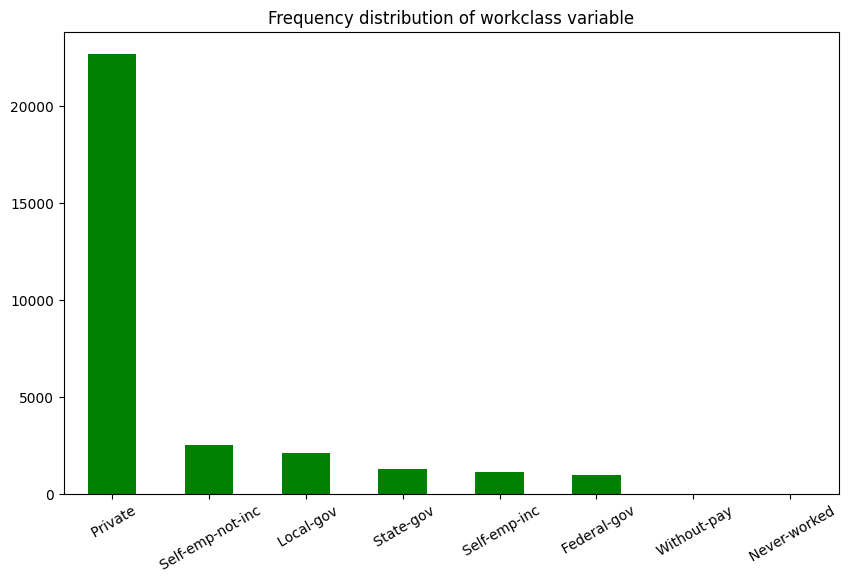

In [26]:
f, ax = plt.subplots(figsize=(10, 6))
ax = data.workclass.value_counts().plot(kind="bar", color="green")
ax.set_title("Frequency distribution of workclass variable")
ax.set_xticklabels(data.workclass.value_counts().index, rotation=30)
plt.show()

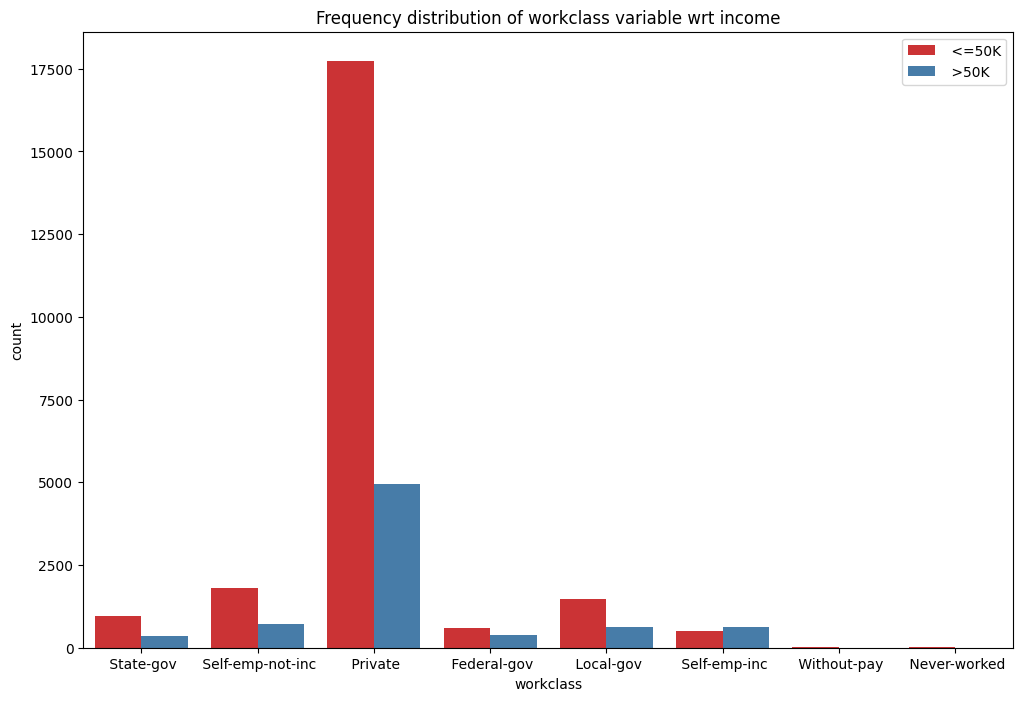

In [27]:
plt.figure(figsize=(12,8))
sns.countplot(x = "workclass", hue = "income", data = data, palette = "Set1")
plt.title("Frequency distribution of workclass variable wrt income")
plt.legend()
plt.show()

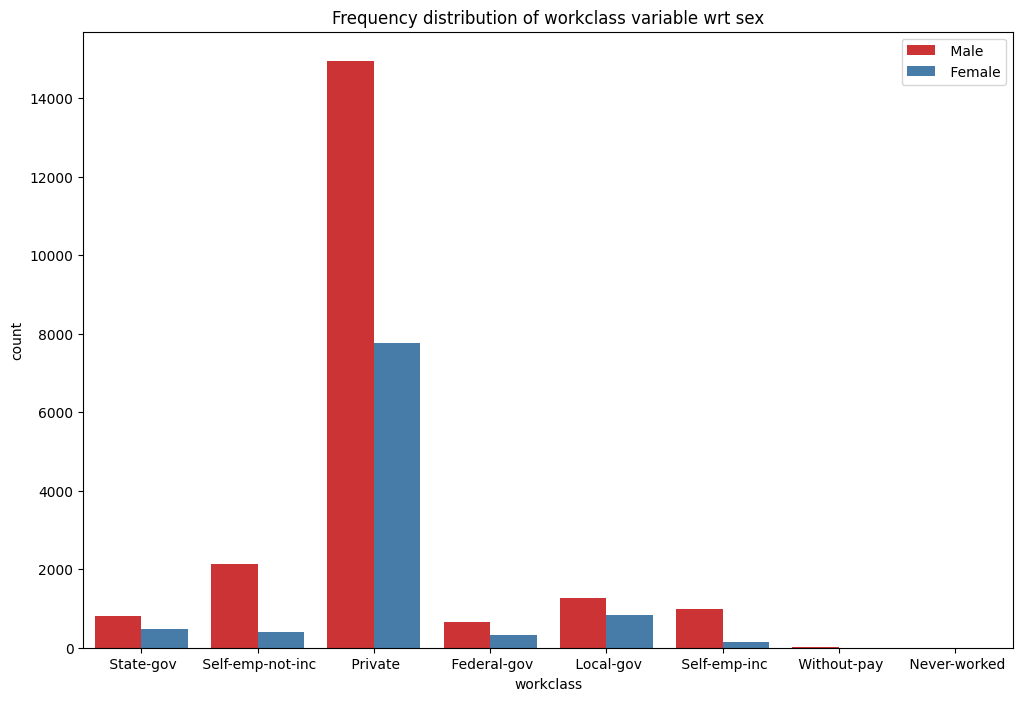

In [28]:
plt.figure(figsize=(12,8))
sns.countplot(x = "workclass", hue = "sex", data = data, palette = "Set1")
plt.title("Frequency distribution of workclass variable wrt sex")
plt.legend()
plt.show()

In [29]:
data.occupation.nunique()

15

In [30]:
data.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [31]:
data.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [32]:
data.occupation.replace(" ?", np.NaN, inplace=True)

In [33]:
data.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

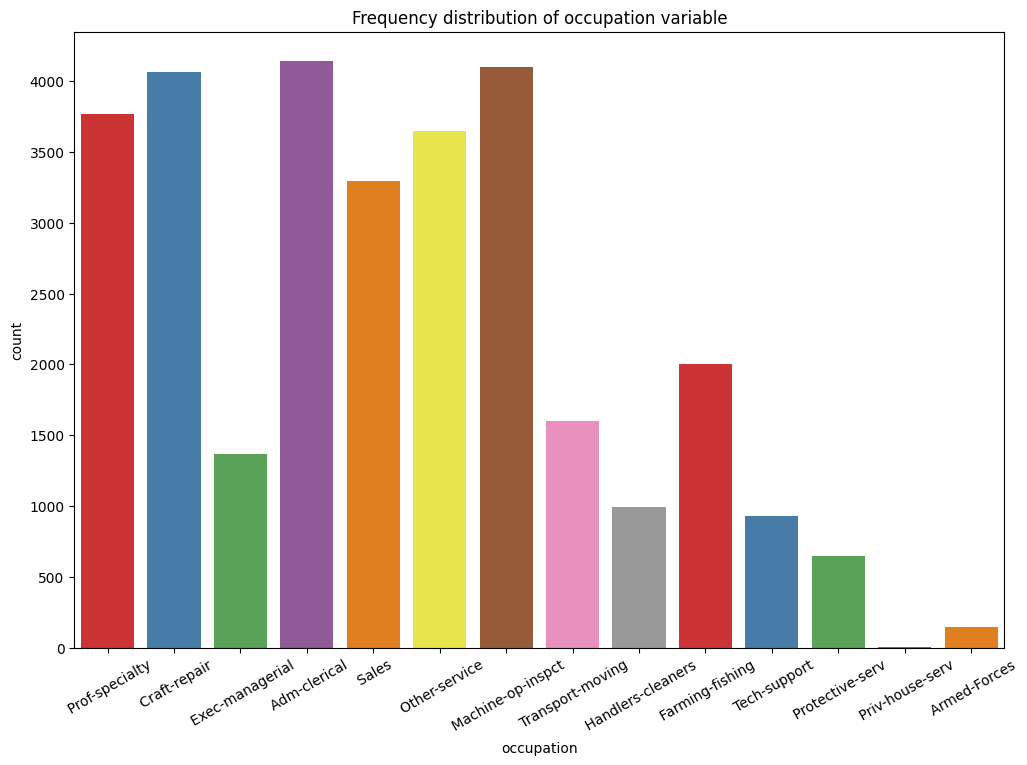

In [34]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="occupation", data=data, palette="Set1")
ax.set_title("Frequency distribution of occupation variable")
ax.set_xticklabels(data.occupation.value_counts().index, rotation=30)
plt.show()

In [35]:
data[categorical].head()

workclass   education       marital_status          occupation  \
0          State-gov   Bachelors        Never-married        Adm-clerical   
1   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
2            Private     HS-grad             Divorced   Handlers-cleaners   
3            Private        11th   Married-civ-spouse   Handlers-cleaners   
4            Private   Bachelors   Married-civ-spouse      Prof-specialty   

     relationship    race      sex  native_country  income  
0   Not-in-family   White     Male   United-States   <=50K  
1         Husband   White     Male   United-States   <=50K  
2   Not-in-family   White     Male   United-States   <=50K  
3         Husband   Black     Male   United-States   <=50K  
4            Wife   Black   Female            Cuba   <=50K

In [36]:
data.native_country.value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [37]:
data.native_country.replace(' ?', np.NaN, inplace=True)

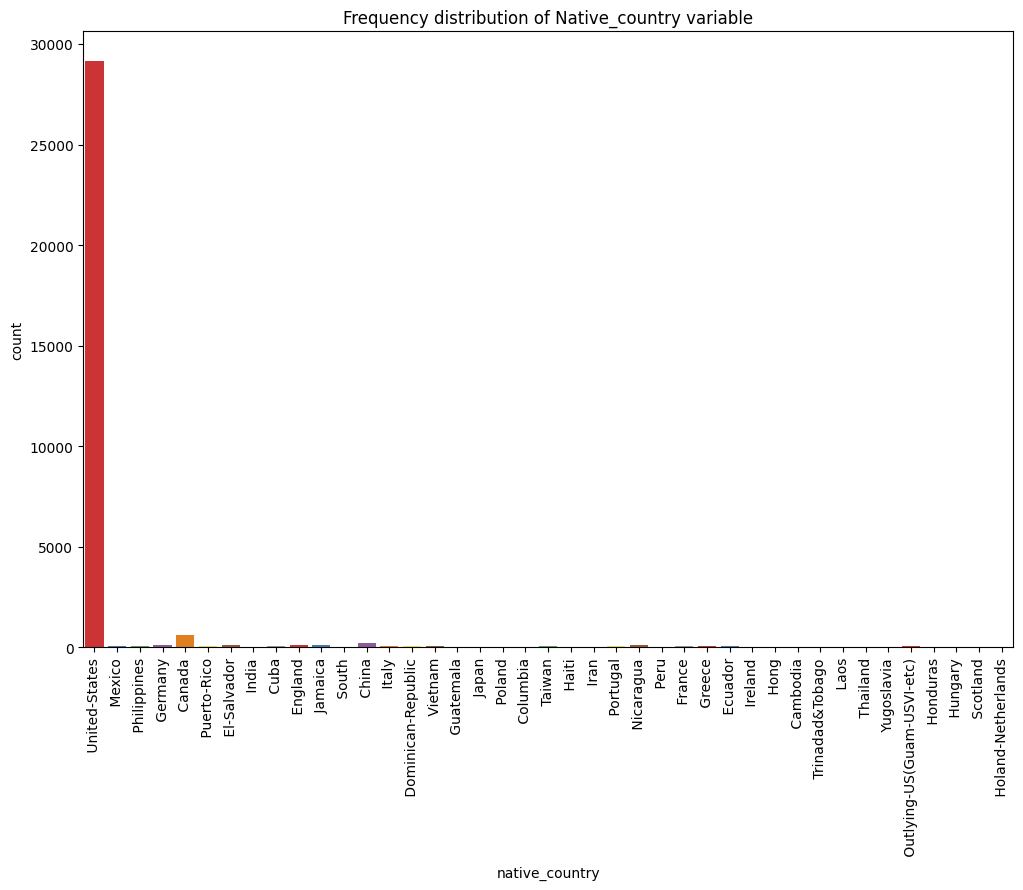

In [38]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="native_country", data=data, palette="Set1")
ax.set_title("Frequency distribution of Native_country variable")
ax.set_xticklabels(data.native_country.value_counts().index, rotation=90)
plt.show()

In [39]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [40]:
for var in categorical:

    print(var, ' contains ', len(data[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
marital_status  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native_country  contains  42  labels
income  contains  2  labels


In [41]:
numerical = [num for num in data.columns if data[num].dtype != "object"]
numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [42]:
data[numerical].head()

age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week
0   39   77516             13          2174             0              40
1   50   83311             13             0             0              13
2   38  215646              9             0             0              40
3   53  234721              7             0             0              40
4   28  338409             13             0             0              40

In [43]:
data.age.nunique()

73

<ipython-input-44-ab4dcb117a5d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, bins = 10, color = "green")


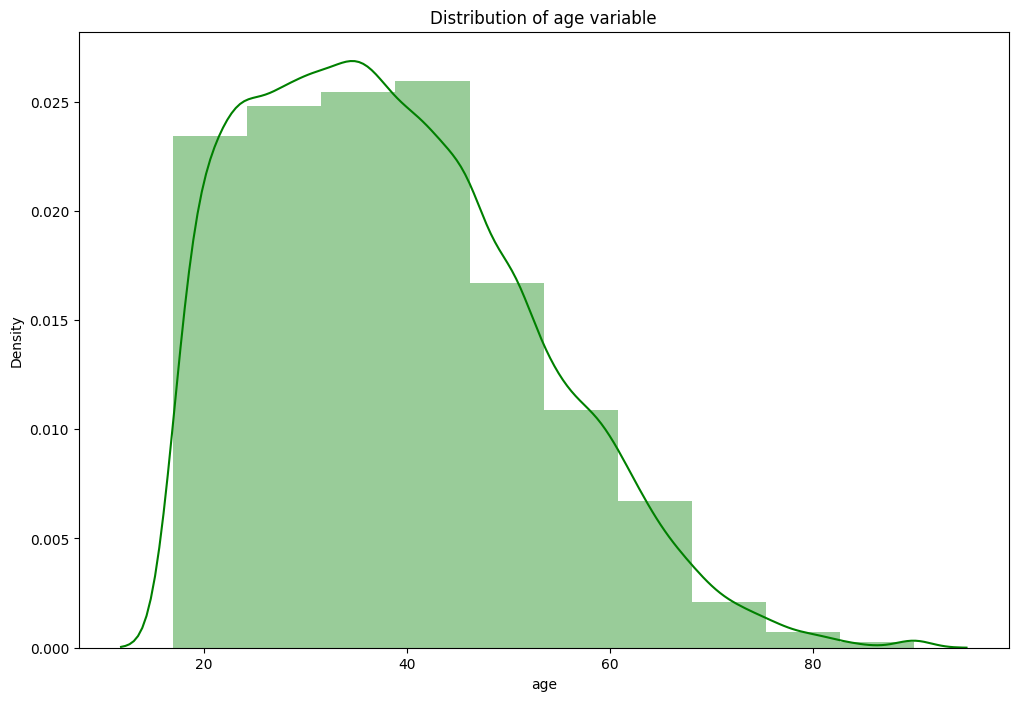

In [44]:
f, ax = plt.subplots(figsize = (12,8))
x = data.age
ax = sns.distplot(x, bins = 10, color = "green")
ax.set_title("Distribution of age variable")
plt.show()

<ipython-input-45-b2cdc3c69740>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, bins=10, color='blue')


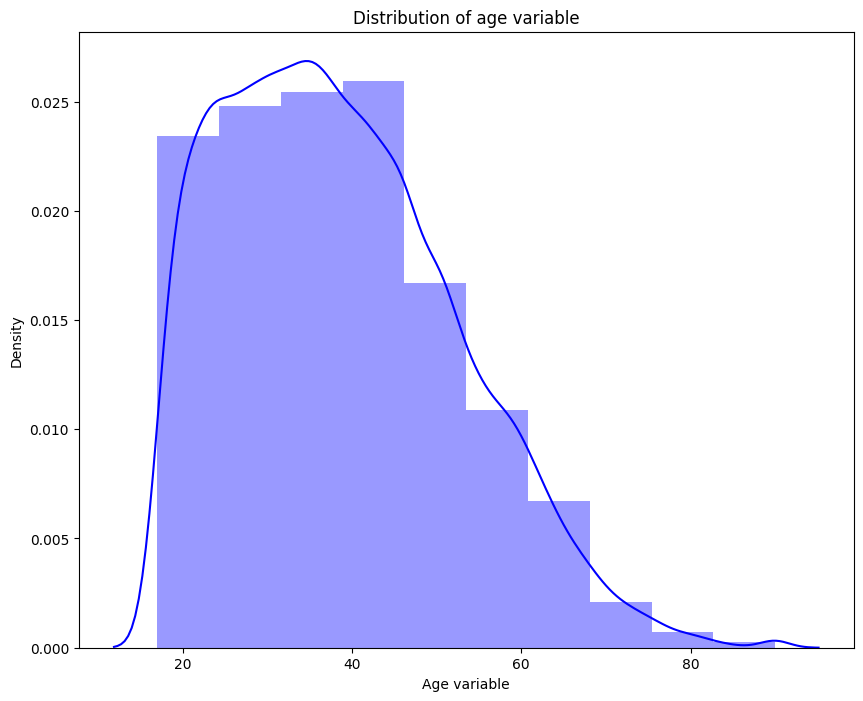

In [45]:
f, ax = plt.subplots(figsize=(10,8))
x = data['age']
x = pd.Series(x, name="Age variable")
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of age variable")
plt.show()

<ipython-input-46-d6bfda1e70f6>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(x, shade=True, color='red')


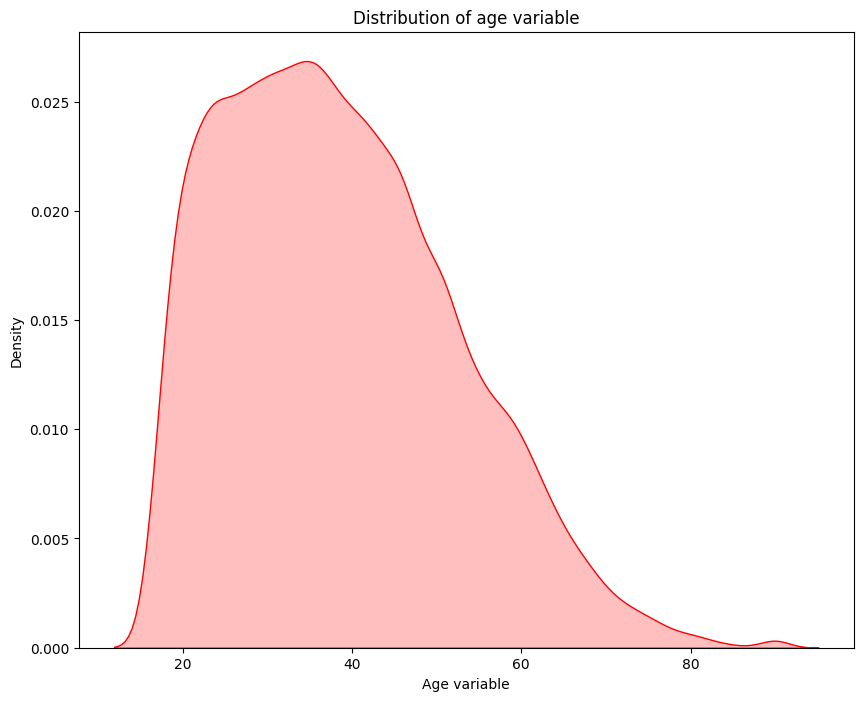

In [46]:
f, ax = plt.subplots(figsize=(10,8))
x = data['age']
x = pd.Series(x, name="Age variable")
ax = sns.kdeplot(x, shade=True, color='red')
ax.set_title("Distribution of age variable")
plt.show()

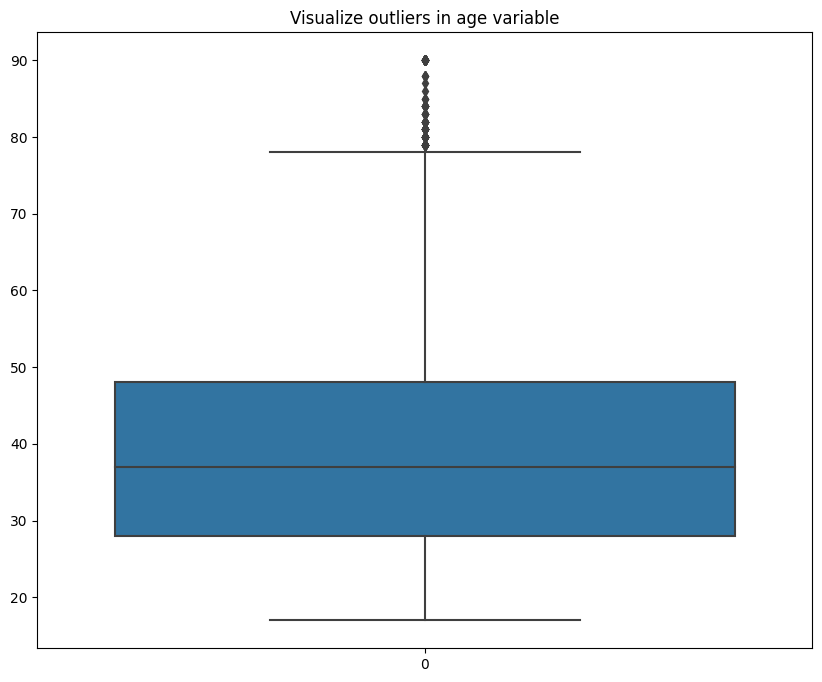

In [47]:
f, ax = plt.subplots(figsize=(10,8))
x = data['age']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in age variable")
plt.show()

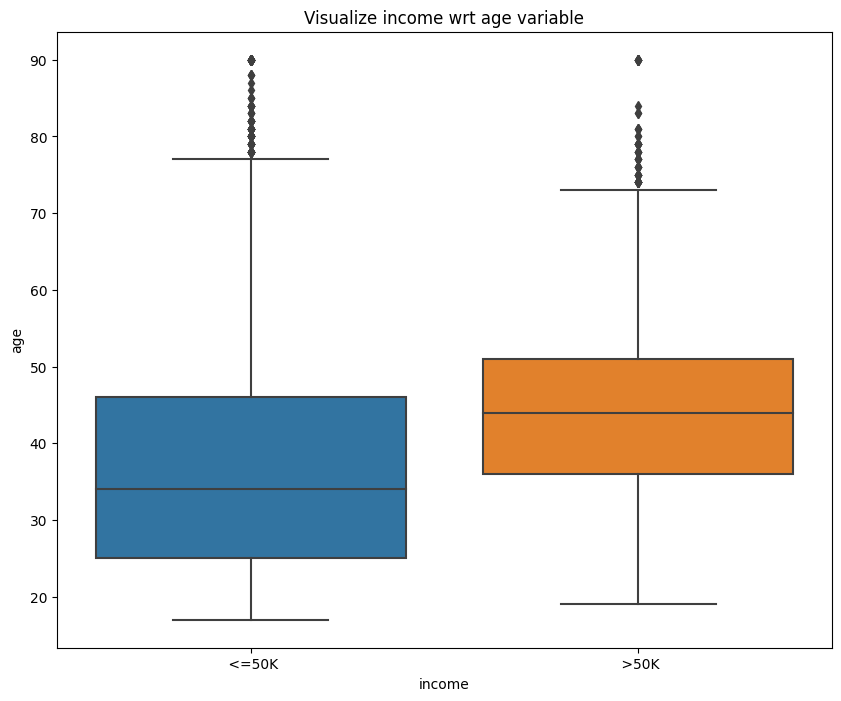

In [48]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="income", y="age", data=data)
ax.set_title("Visualize income wrt age variable")
plt.show()

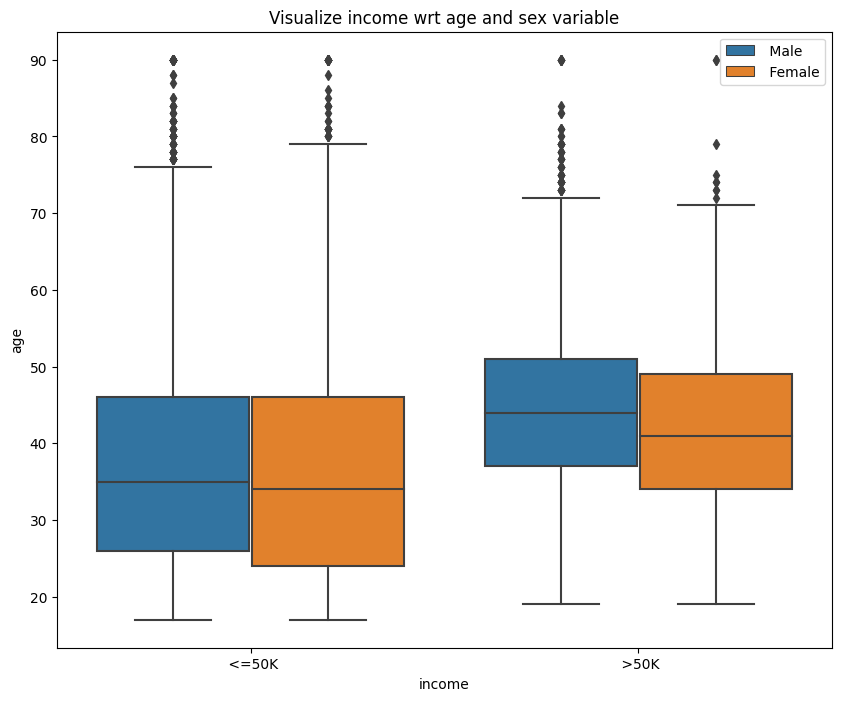

In [49]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="income", y="age", hue="sex", data=data)
ax.set_title("Visualize income wrt age and sex variable")
ax.legend(loc='upper right')
plt.show()

<Figure size 800x600 with 0 Axes>

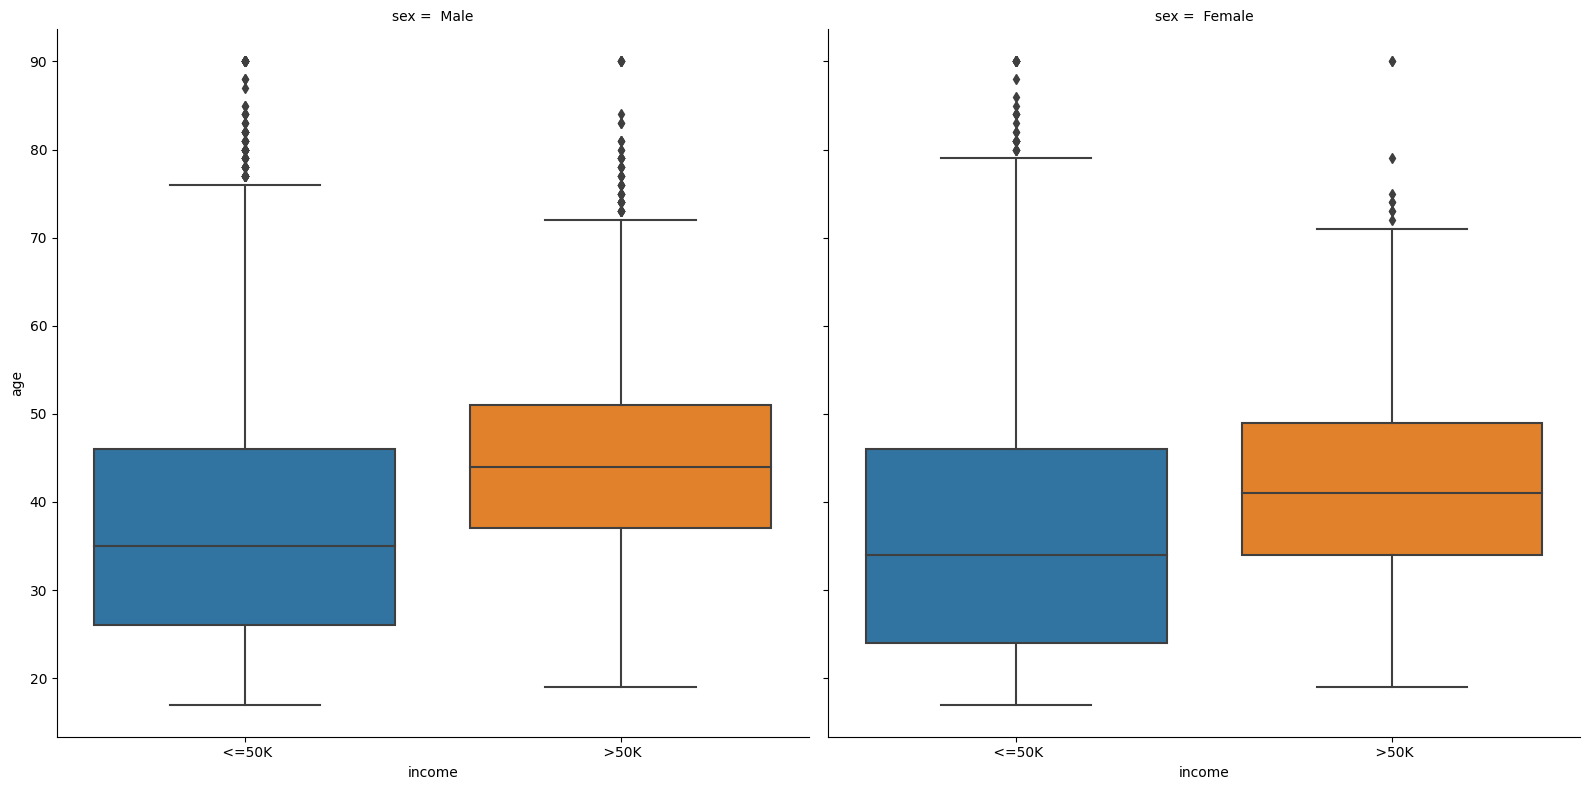

In [50]:
plt.figure(figsize=(8,6))
ax = sns.catplot(x="income", y="age", col="sex", data=data, kind="box", height=8, aspect=1)
plt.show()

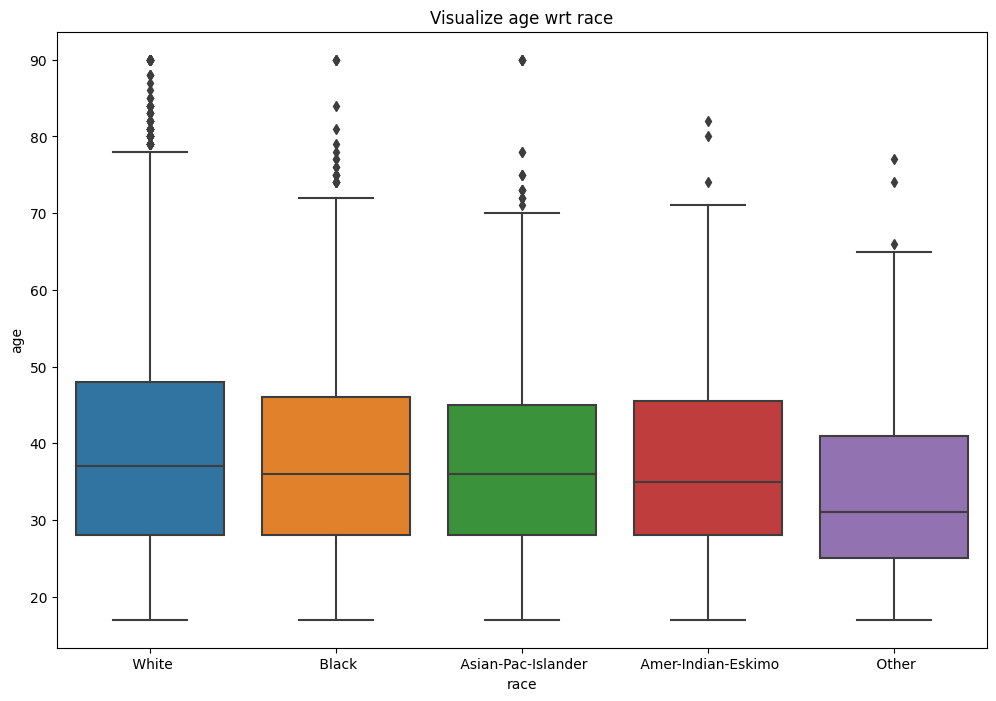

In [51]:
plt.figure(figsize=(12,8))
sns.boxplot(x ='race', y="age", data = data)
plt.title("Visualize age wrt race")
plt.show()

In [52]:
data.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

<ipython-input-52-d6af23af0696>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)


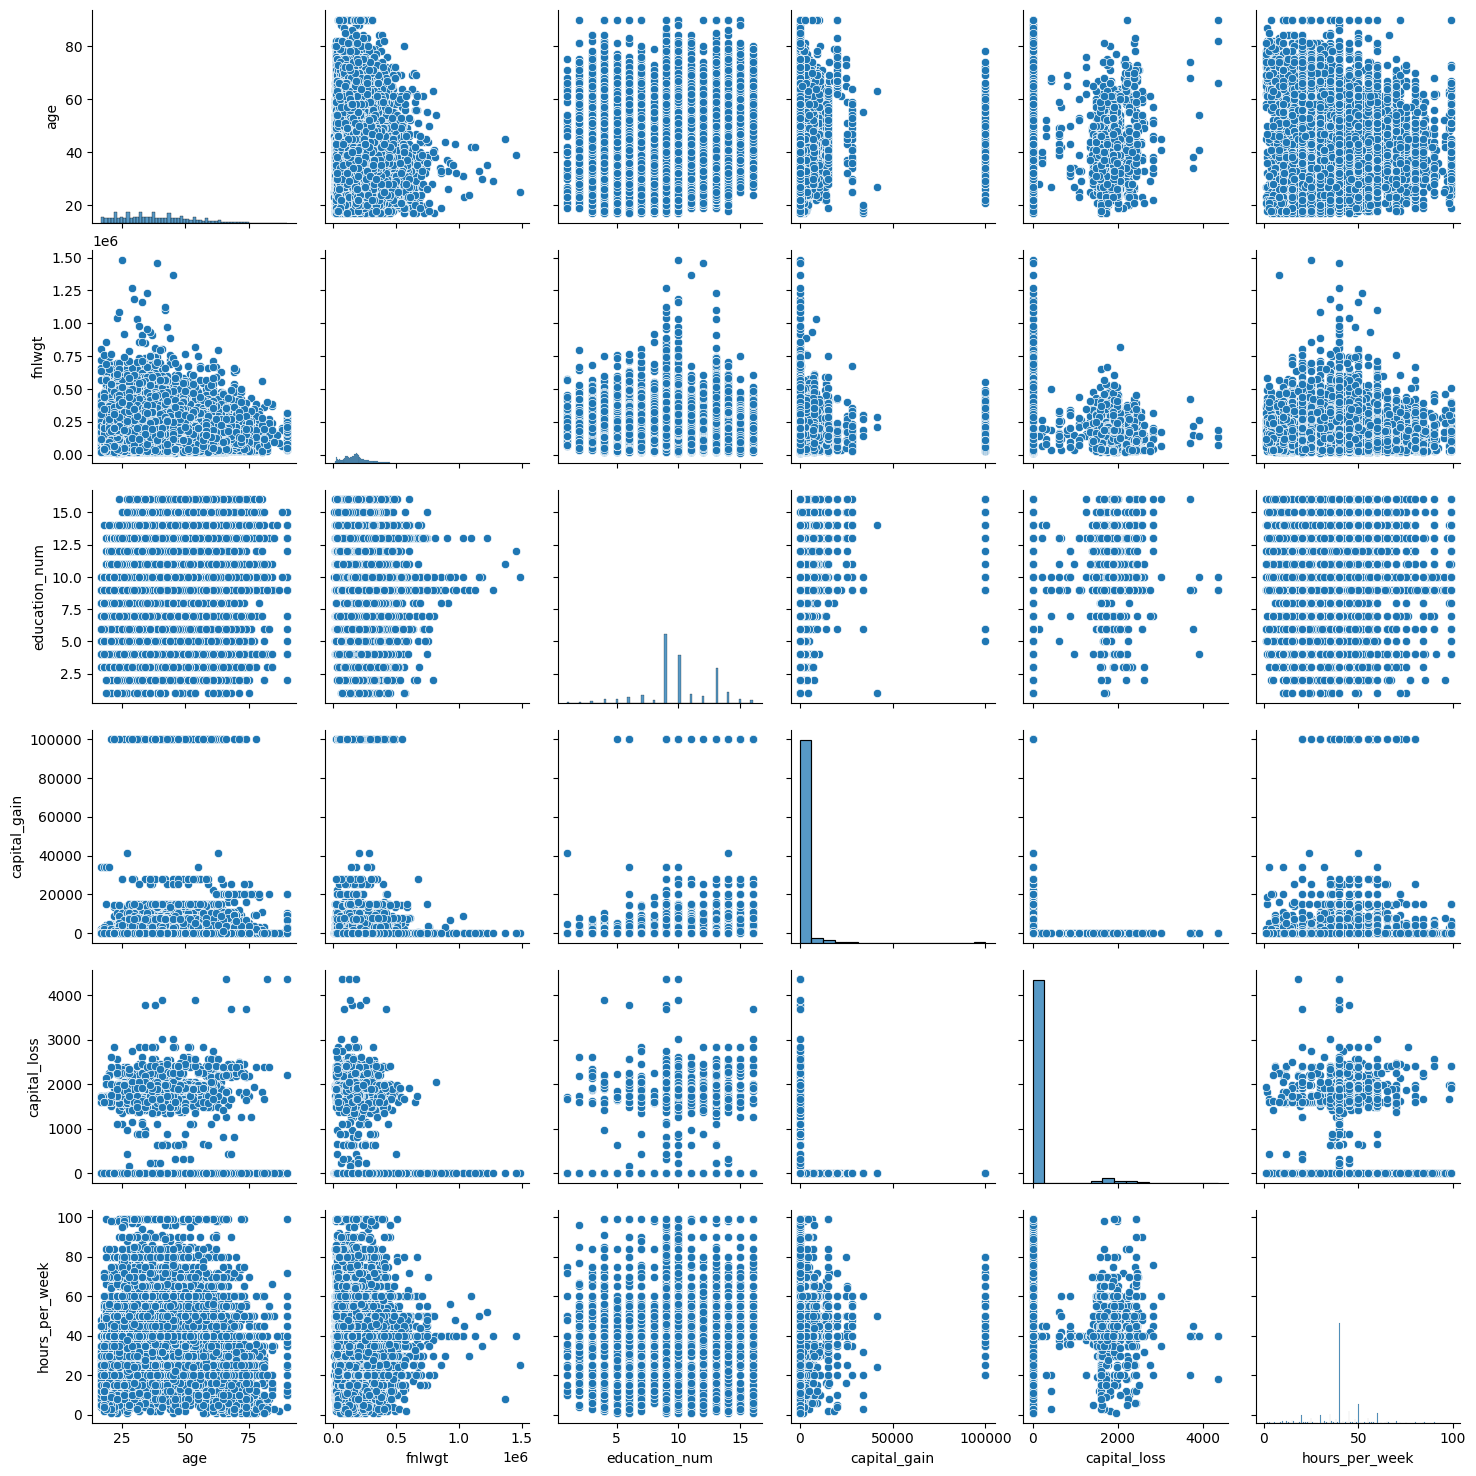

In [53]:
sns.pairplot(data)
plt.show()

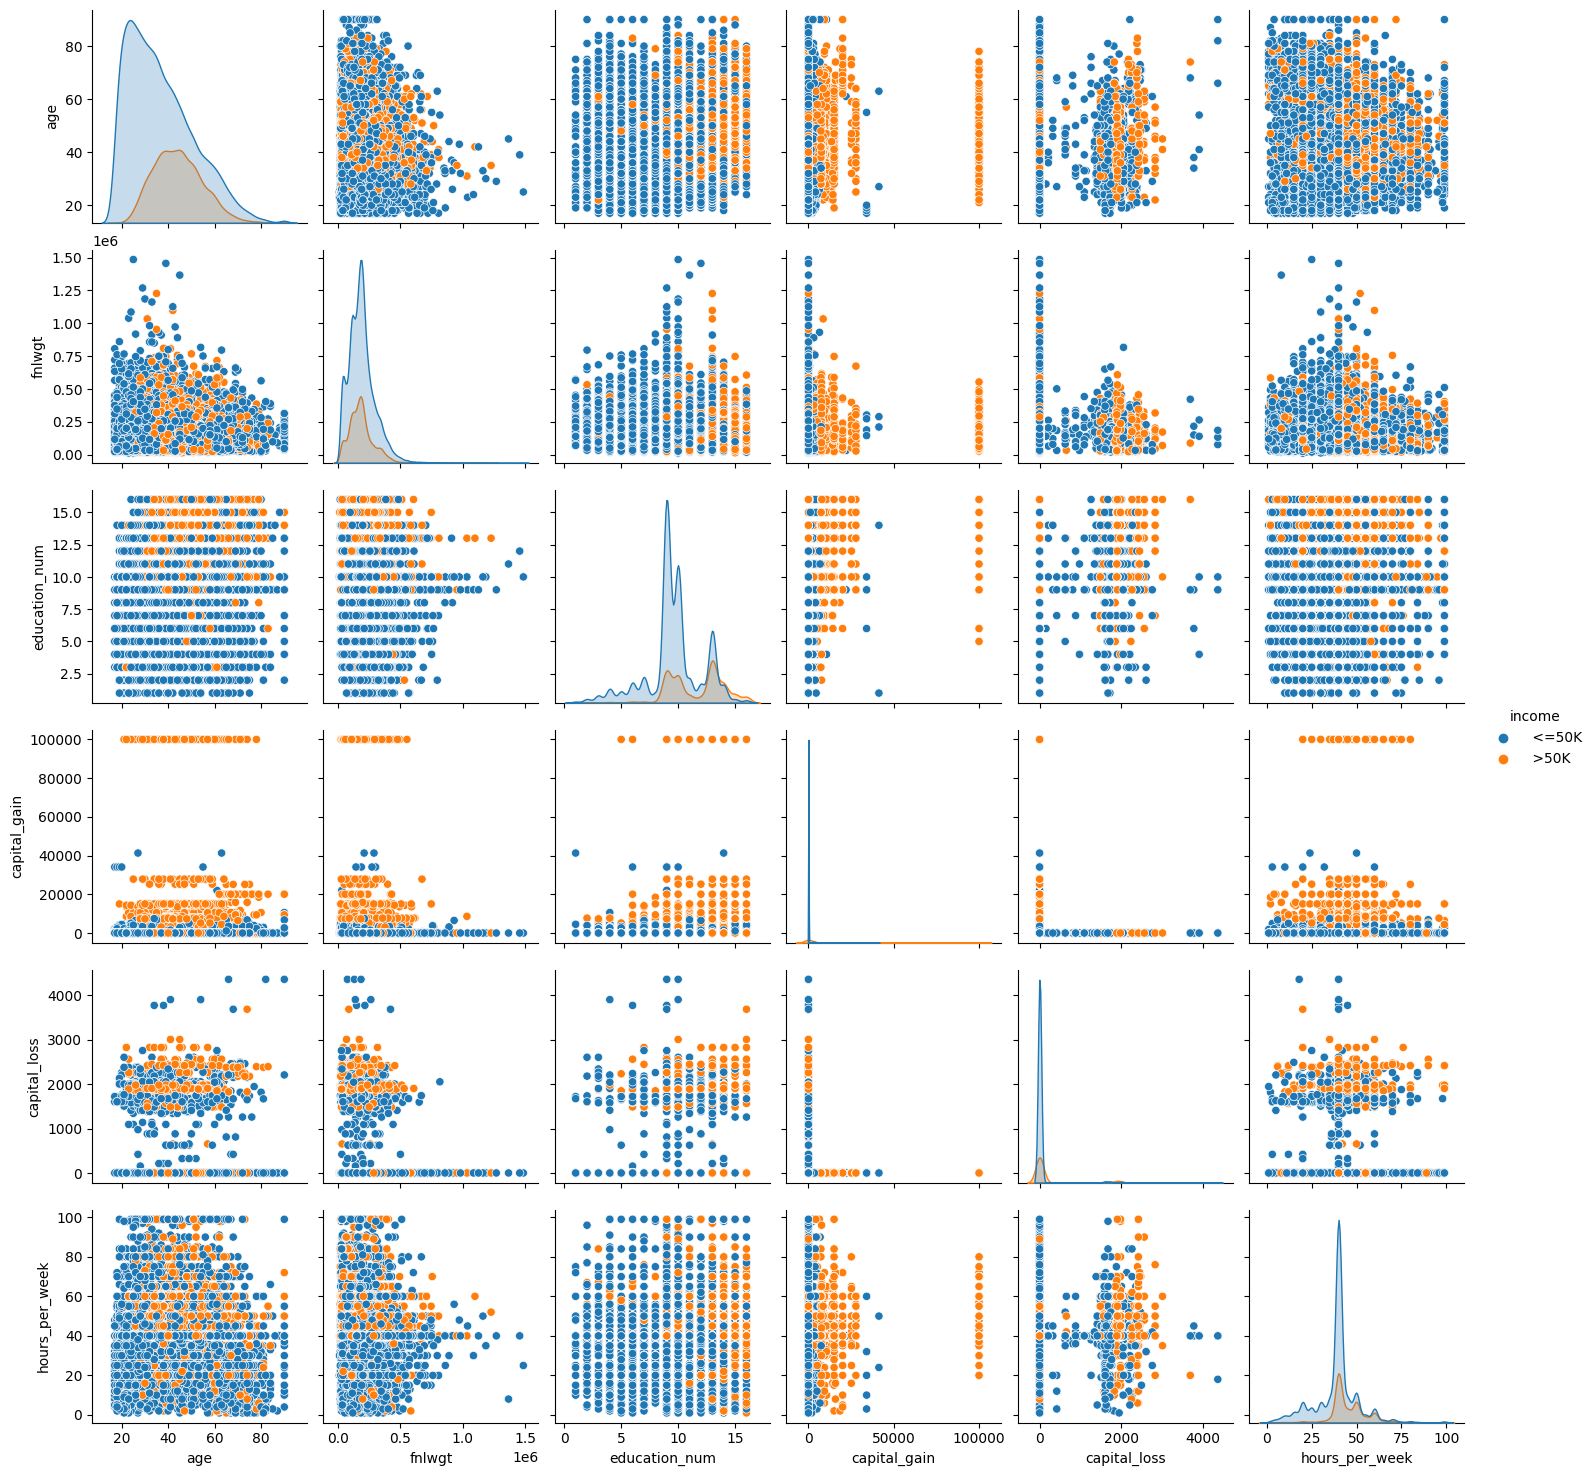

In [54]:
sns.pairplot(data, hue = "income")
plt.show()

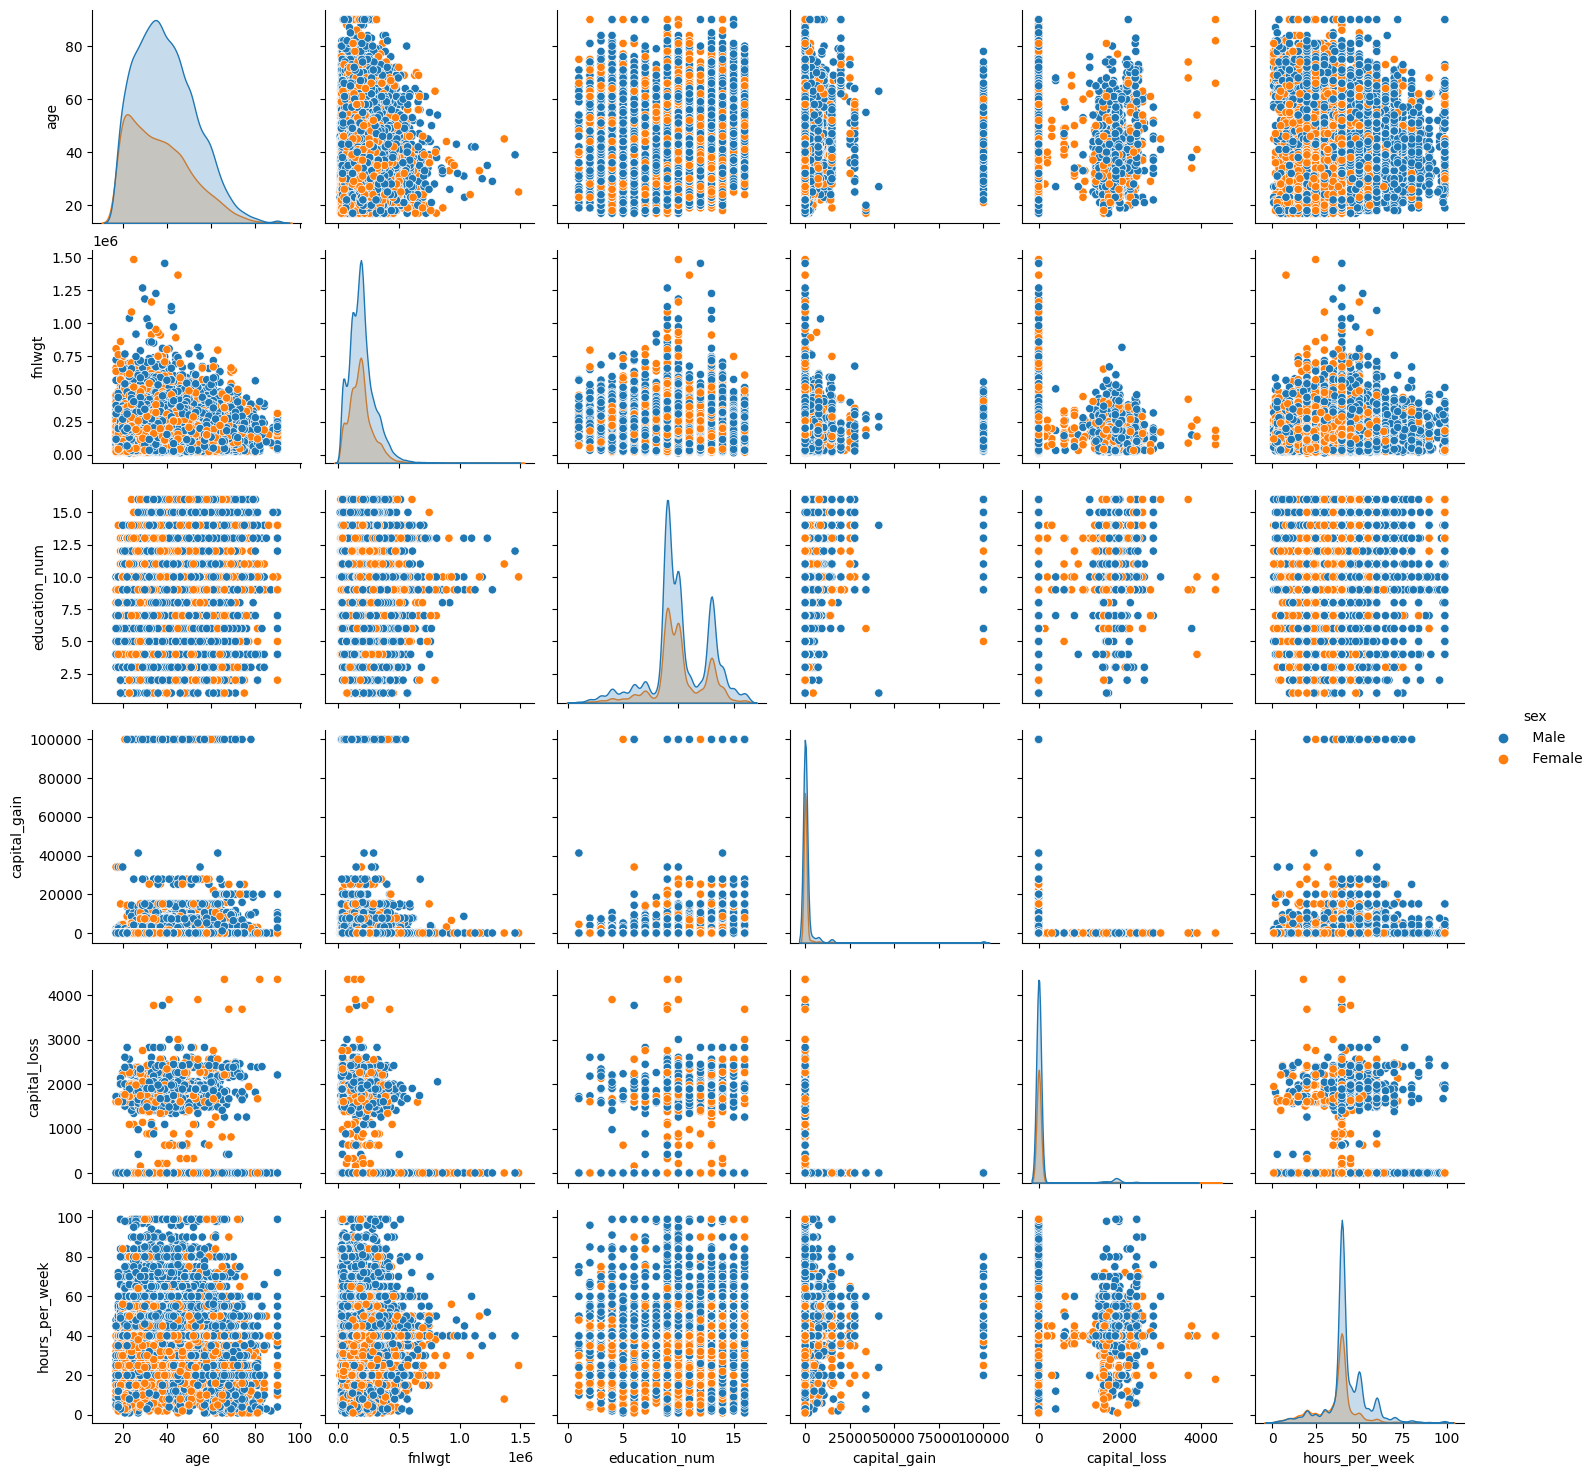

In [55]:
sns.pairplot(data, hue = "sex")
plt.show()

In [56]:
X = data.drop(["income"], axis = 1)
y = data["income"]

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((22792, 14), (9769, 14), (22792,), (9769,))

In [59]:
categorical = [cat for cat in x_train.columns if x_train[cat].dtype == "object"]
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [60]:
numerical = [num for num in x_train.columns if x_train[num].dtype != "object"]
numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [61]:
x_train[categorical].isnull().mean()

workclass         0.055985
education         0.000000
marital_status    0.000000
occupation        0.056072
relationship      0.000000
race              0.000000
sex               0.000000
native_country    0.018164
dtype: float64

In [62]:
for col in categorical:
  if x_train[col].isnull().mean() > 0:
    print(col, (x_train[col].isnull().mean()))

workclass 0.055984555984555984
occupation 0.05607230607230607
native_country 0.018164268164268166


In [63]:
for df in [x_train, x_test]:
  df["workclass"].fillna(x_train["workclass"].mode()[0], inplace=True)
  df["occupation"].fillna(x_train["occupation"].mode()[0], inplace=True)
  df["native_country"].fillna(x_train["native_country"].mode()[0], inplace=True)

In [64]:
x_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [65]:
x_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [66]:
x_train.shape, x_test.shape

((22792, 14), (9769, 14))

In [67]:
x_train[categorical].head()

workclass      education       marital_status     occupation  \
32098     Private        HS-grad   Married-civ-spouse   Craft-repair   
25206   State-gov        HS-grad             Divorced   Adm-clerical   
23491     Private   Some-college   Married-civ-spouse          Sales   
12367     Private        HS-grad        Never-married   Craft-repair   
7054      Private        7th-8th        Never-married   Craft-repair   

         relationship    race      sex  native_country  
32098         Husband   White     Male   United-States  
25206       Unmarried   White   Female   United-States  
23491         Husband   White     Male   United-States  
12367   Not-in-family   White     Male       Guatemala  
7054    Not-in-family   White     Male         Germany

In [68]:
x_train[categorical].columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'],
      dtype='object')

In [70]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 4.1 MB/s eta 0:00:00


In [71]:
import category_encoders as ce

In [72]:
encoder = ce.OneHotEncoder(cols = ['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'])
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

In [73]:
x_train.head()

age  workclass_1  workclass_2  workclass_3  workclass_4  workclass_5  \
32098   45            1            0            0            0            0   
25206   47            0            1            0            0            0   
23491   48            1            0            0            0            0   
12367   29            1            0            0            0            0   
7054    23            1            0            0            0            0   

       workclass_6  workclass_7  workclass_8  fnlwgt  ...  native_country_32  \
32098            0            0            0  170871  ...                  0   
25206            0            0            0  108890  ...                  0   
23491            0            0            0  187505  ...                  0   
12367            0            0            0  145592  ...                  0   
7054             0            0            0  203003  ...                  0   

       native_country_33  native_country_34  native_country_35  \
32098                  0                  0                  0   
25206                  0                  0                  0   
23491                  0                  0                  0   
12367                  0                  0                  0   
7054                   0                  0                  0   

       native_country_36  native_country_37  native_country_38  \
32098                  0                  0                  0   
25206                  0                  0                  0   
23491                  0                  0                  0   
12367                  0                  0                  0   
7054                   0                  0                  0   

       native_country_39  native_country_40  native_country_41  
32098                  0                  0                  0  
25206                  0                  0                  0  
23491                  0                  0                  0  
12367                  0                  0                  0  
7054                   0                  0                  0  

[5 rows x 105 columns]

In [74]:
x_test.head()

age  workclass_1  workclass_2  workclass_3  workclass_4  workclass_5  \
22278   27            1            0            0            0            0   
8950    27            1            0            0            0            0   
7838    25            1            0            0            0            0   
16505   46            1            0            0            0            0   
19140   45            1            0            0            0            0   

       workclass_6  workclass_7  workclass_8  fnlwgt  ...  native_country_32  \
22278            0            0            0  177119  ...                  0   
8950             0            0            0  216481  ...                  0   
7838             0            0            0  256263  ...                  0   
16505            0            0            0  147640  ...                  0   
19140            0            0            0  172822  ...                  0   

       native_country_33  native_country_34  native_country_35  \
22278                  0                  0                  0   
8950                   0                  0                  0   
7838                   0                  0                  0   
16505                  0                  0                  0   
19140                  0                  0                  0   

       native_country_36  native_country_37  native_country_38  \
22278                  0                  0                  0   
8950                   0                  0                  0   
7838                   0                  0                  0   
16505                  0                  0                  0   
19140                  0                  0                  0   

       native_country_39  native_country_40  native_country_41  
22278                  0                  0                  0  
8950                   0                  0                  0  
7838                   0                  0                  0  
16505                  0                  0                  0  
19140                  0                  0                  0  

[5 rows x 105 columns]

In [75]:
#print(x_test.head())
print(x_test.shape)

(9769, 105)


In [76]:
cols = x_train.columns

In [77]:
from sklearn.preprocessing import RobustScaler

In [78]:
rc = RobustScaler()
x_train = rc.fit_transform(x_train)
x_test = rc.transform(x_test)

In [79]:
x_train = pd.DataFrame(x_train, columns = [cols])
x_test = pd.DataFrame(x_test, columns = [cols])

In [80]:
x_train.head()

age workclass_1 workclass_2 workclass_3 workclass_4 workclass_5  \
0  0.40         0.0         0.0         0.0         0.0         0.0   
1  0.50        -1.0         1.0         0.0         0.0         0.0   
2  0.55         0.0         0.0         0.0         0.0         0.0   
3 -0.40         0.0         0.0         0.0         0.0         0.0   
4 -0.70         0.0         0.0         0.0         0.0         0.0   

  workclass_6 workclass_7 workclass_8    fnlwgt  ... native_country_32  \
0         0.0         0.0         0.0 -0.058906  ...               0.0   
1         0.0         0.0         0.0 -0.578076  ...               0.0   
2         0.0         0.0         0.0  0.080425  ...               0.0   
3         0.0         0.0         0.0 -0.270650  ...               0.0   
4         0.0         0.0         0.0  0.210240  ...               0.0   

  native_country_33 native_country_34 native_country_35 native_country_36  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

  native_country_37 native_country_38 native_country_39 native_country_40  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

  native_country_41  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  

[5 rows x 105 columns]

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [82]:
rfc = RandomForestClassifier(random_state  = 0)
rfc.fit(x_train, y_train)
pred = rfc.predict(x_test)
accuracy_score(y_test, pred)

0.8520831200737026

In [83]:
rfc1 = RandomForestClassifier(n_estimators = 100, random_state = 0)
rfc1.fit(x_train, y_train)
pred1 = rfc1.predict(x_test)
accuracy_score(y_test, pred1)

0.8520831200737026

In [84]:
feature_scores = pd.Series(rfc1.feature_importances_, index=x_train.columns).sort_values(ascending=False)

feature_scores

fnlwgt               0.159772
age                  0.149074
capital_gain         0.091299
hours_per_week       0.086339
education_num        0.065130
                       ...   
native_country_16    0.000028
occupation_14        0.000015
native_country_35    0.000009
workclass_8          0.000008
native_country_41    0.000000
Length: 105, dtype: float64

In [85]:
x_train = x_train.drop(["native_country_41"], axis = 1)
x_test = x_test.drop(["native_country_41"], axis = 1)

<ipython-input-85-1547cf9cc4c6>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x_train = x_train.drop(["native_country_41"], axis = 1)
<ipython-input-85-1547cf9cc4c6>:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x_test = x_test.drop(["native_country_41"], axis = 1)


In [86]:
rfc3 = RandomForestClassifier(n_estimators = 100, random_state = 0)
rfc3.fit(x_train, y_train)
y_pred = rfc3.predict(x_test)
accuracy_score(y_test, y_pred)

0.8544375063977889

In [87]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[6867,  540],
       [ 882, 1480]])

<Axes: >

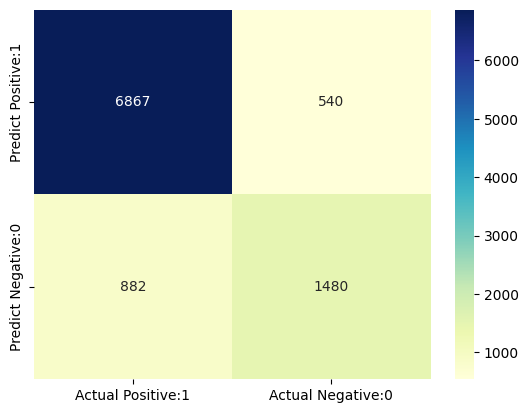

In [88]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [89]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7407
        >50K       0.73      0.63      0.68      2362

    accuracy                           0.85      9769
   macro avg       0.81      0.78      0.79      9769
weighted avg       0.85      0.85      0.85      9769

